In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import torch
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch.distributions as distr
from collections import defaultdict

In [3]:
# configure matplotlib
# %matplotlib notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (13.5, 13.5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [4]:
from cdi.data.frey_faces import FreyFacesDataset
from cdi.util.analysis.show_frey_faces import show_examples
from cdi.trainers.complete_mle import CompleteMLE
from cdi.trainers.expectation_maximisation import EM
from cdi.trainers.mc_expectation_maximisation import MCEM

In [5]:
log_path_base = f'../../trained_models/{{}}'

In [6]:
def load_model(method, checkpoint_path):   
    model = None
    if method == 'complete_mle':
        model = CompleteMLE.load_from_checkpoint(checkpoint_path)
    elif method == 'expectation-maximisation':
        model = EM.load_from_checkpoint(checkpoint_path)
    elif method == 'mc-expectation-maximisation':
        model = MCEM.load_from_checkpoint(checkpoint_path)
    else:
        raise Exception(f'Invalid method: {method}')
    
    return model

def load_obs_mean(path):
    return np.load(path, allow_pickle=True)['obs_mean']

# Defaults

In [7]:
original_dataset = FreyFacesDataset('../../data', preprocess=False)

# Generate dataset from VAE model trained on complete data

In [8]:
dataset_name = 'frey_faces_processed/fcvae_for_synthetic_data/1'
name = 'fcvae_complete_data'
seed_stamp = 'm20190508_d20200325_20200406_20200407'
which_model = '_ckpt_epoch_705'
model = load_model('complete_mle', '{}/{}/{}/saved_models/{}.ckpt'.format(log_path_base.format(dataset_name), name, seed_stamp, which_model))
model = model.fa_model

obs_mean = load_obs_mean(log_path_base.format(f'{dataset_name}/{name}/{seed_stamp}/logs/tensors/obs_mean_0.npz'))

In [9]:
seed = 20201016
np.random.seed(seed)
torch.manual_seed(seed)

Z = torch.randn(3000, 10)

mean, log_var = model.decode(Z)
multi_gauss = distr.Normal(loc=mean, scale=torch.exp(log_var/2))

generated_data = multi_gauss.sample()
generated_data = generated_data + obs_mean
generated_data_postprocessed = original_dataset.postprocess(generated_data)
# generated_data_postprocessed = generated_data

In [10]:
original_dataset.preprocess(generated_data_postprocessed.max())

tensor(3.9531)

In [11]:
generated_data_postprocessed.max()

tensor(1.1874)

In [12]:
generated_data_postprocessed.min()

tensor(-0.1664)

In [13]:
generated_data_postprocessed.argmin()

tensor(1112305)

In [14]:
generated_data_postprocessed.argmax()

tensor(1345630)

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 2.00000e+00, 4.00000e+00, 2.00000e+01, 4.70000e+01,
        1.13000e+02, 3.14000e+02, 7.14000e+02, 1.67800e+03, 3.69600e+03,
        9.19200e+03, 1.54890e+04, 2.09550e+04, 3.16450e+04, 4.63880e+04,
        6.19500e+04, 8.10790e+04, 1.06058e+05, 1.66405e+05, 2.25627e+05,
        2.10839e+05, 1.66661e+05, 1.17181e+05, 8.94330e+04, 7.95600e+04,
        9.62820e+04, 1.08064e+05, 2.70000e+04, 8.71300e+03, 3.01600e+03,
        1.13600e+03, 4.65000e+02, 1.70000e+02, 6.70000e+01, 2.30000e+01,
        6.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-3.3617103e+00, -3.2154140e+00, -3.0691175e+00, -2.9228213e+00,
        -2.7765250e+00, -2.6302288e+00, -2.4839323e+00, -2.3376360e+00,
        -2.1913397e+00, -2.0450435e+00, -1.8987471e+00, -1.7524507e+00,
        -1.6061544e+00, -1.4598581e+00, -1.3135618e+

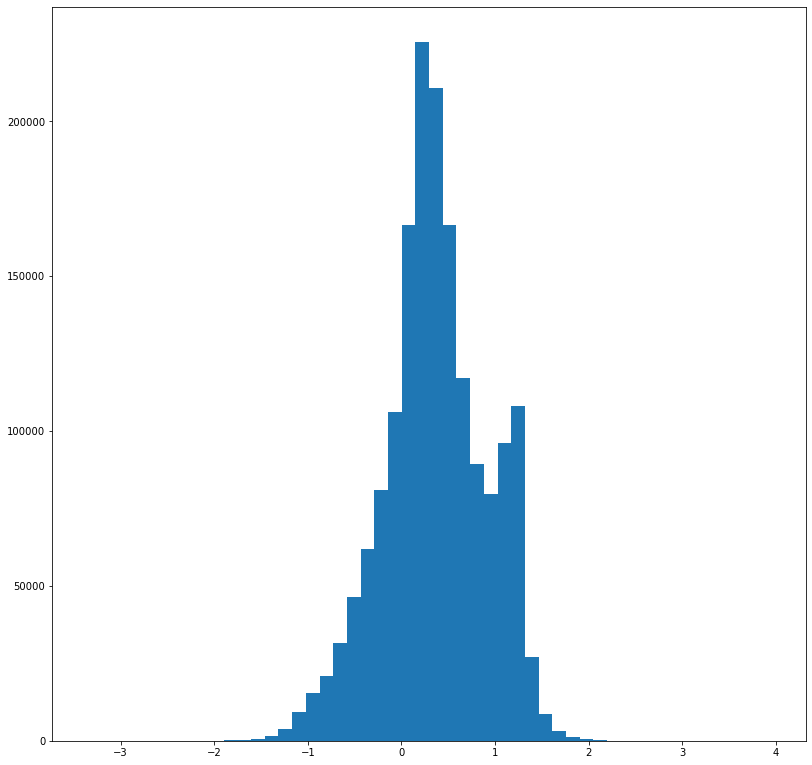

In [15]:
plt.hist(generated_data.numpy().flatten(), bins=50)

(array([1.00000e+00, 0.00000e+00, 3.00000e+00, 1.70000e+01, 4.60000e+01,
        1.14000e+02, 2.94000e+02, 6.23000e+02, 1.07200e+03, 2.01200e+03,
        3.48500e+03, 6.45200e+03, 9.17800e+03, 1.06210e+04, 1.24160e+04,
        1.52030e+04, 1.92090e+04, 2.32930e+04, 2.76330e+04, 3.17860e+04,
        3.55490e+04, 4.11240e+04, 4.64270e+04, 5.28850e+04, 6.39870e+04,
        8.34250e+04, 1.06149e+05, 1.19644e+05, 1.20503e+05, 1.12324e+05,
        1.02186e+05, 8.85210e+04, 7.37870e+04, 6.25040e+04, 5.52390e+04,
        5.17630e+04, 5.11460e+04, 5.92660e+04, 9.54660e+04, 5.85310e+04,
        2.12540e+04, 8.84600e+03, 3.64000e+03, 1.50700e+03, 6.04000e+02,
        2.05000e+02, 4.80000e+01, 8.00000e+00, 1.00000e+00, 3.00000e+00]),
 array([-0.1664089 , -0.1393331 , -0.11225731, -0.08518151, -0.05810572,
        -0.03102993, -0.00395413,  0.02312166,  0.05019745,  0.07727325,
         0.10434904,  0.13142483,  0.15850063,  0.18557642,  0.21265222,
         0.239728  ,  0.2668038 ,  0.2938796 ,  0

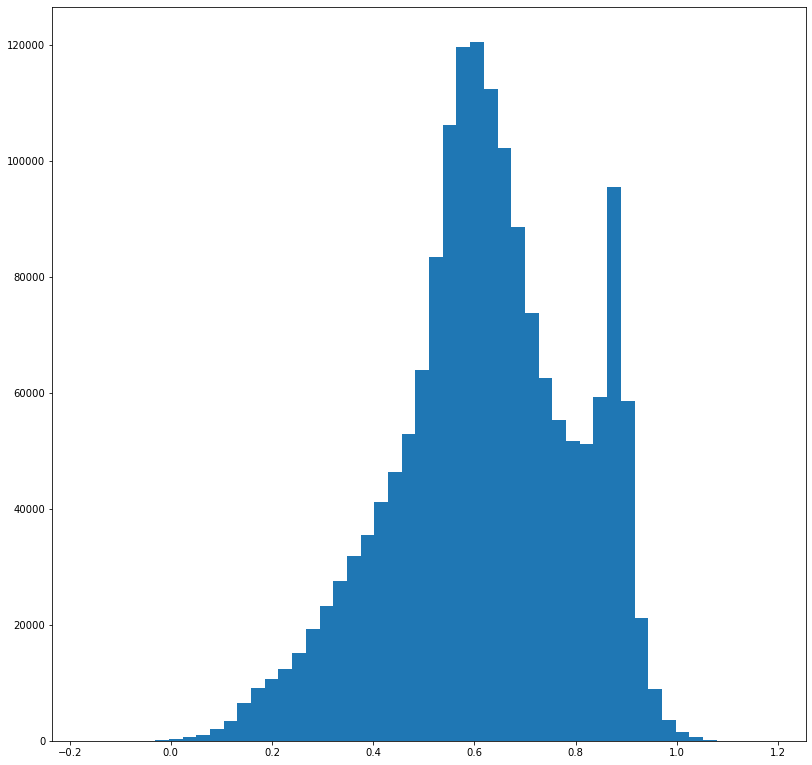

In [16]:
plt.hist(generated_data_postprocessed.numpy().flatten(), bins=50)

(array([  432.,   367.,   616.,   905.,  1451.,  2167.,  3360.,  5249.,
         6656.,  7657.,  8286.,  9347., 10996., 13105., 14996., 17547.,
        19787., 22382., 24141., 26477., 29529., 32592., 35351., 38956.,
        44332., 53768., 64983., 78020., 86785., 89752., 88373., 83432.,
        78173., 72513., 63659., 55979., 48682., 44178., 40378., 38529.,
        37499., 38462., 44051., 59698., 72956., 31193., 15499.,  8166.,
         4199.,  4389.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ], dtype=float32),
 <BarContainer object of 50 artists>)

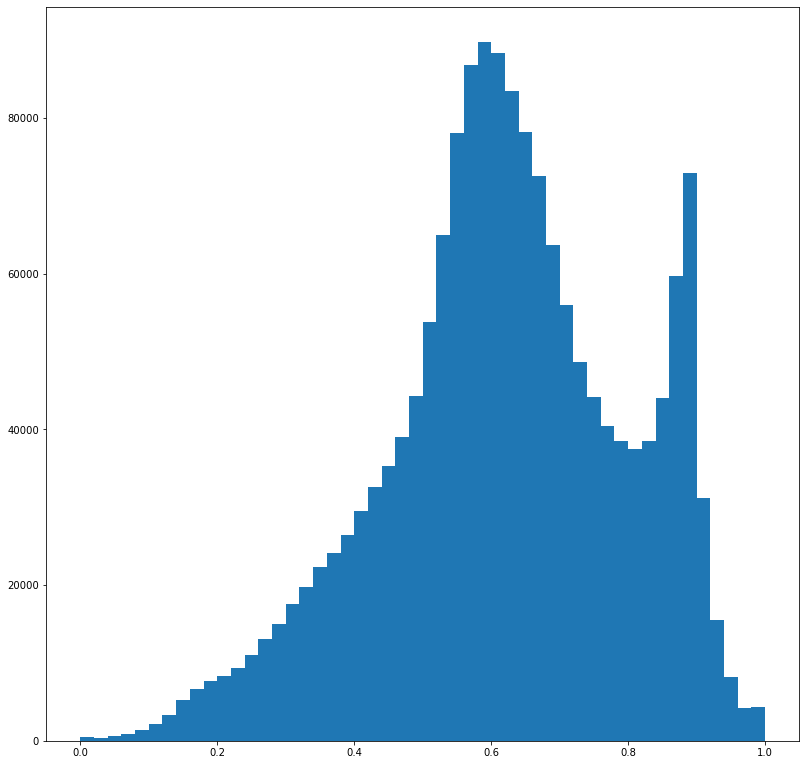

In [17]:
plt.hist(np.clip(generated_data_postprocessed.numpy().flatten(), 0, 1), bins=50)

To show the examples we clip them to [0,1] range.

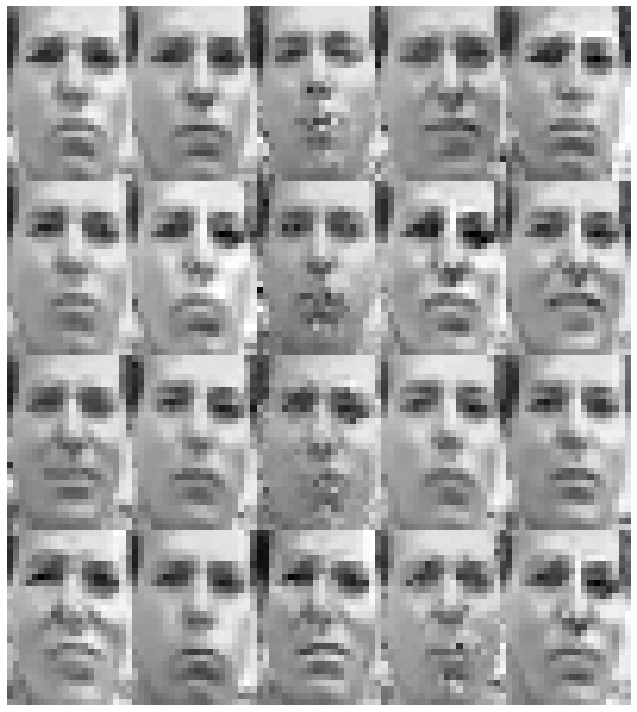

In [18]:
# Show examples
ids = np.random.choice(np.arange(len(generated_data_postprocessed)), 20)
show_data = np.clip(generated_data_postprocessed, 0, 1)[ids].detach().numpy()
# show_data = generated_data_postprocessed[ids].detach().numpy()
mask = np.ones_like(show_data)
show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False)

## Save generated dataset to file

In [19]:
data = {
    "ff": generated_data_postprocessed.detach().numpy().T,
    "seed": seed
}

# Save and return samples
# sio.savemat(file_name='../../data/fcvae_frey_generated_large.mat', mdict=data)

### Create test data

In [20]:
seed = 202010161234
Z = torch.randn(3000, 10)

mean, log_var = model.decode(Z)
multi_gauss = distr.Normal(loc=mean, scale=torch.exp(log_var/2))

generated_data = multi_gauss.sample()
generated_data = generated_data + obs_mean
generated_data_postprocessed = original_dataset.postprocess(generated_data)

data = {
    "ff": generated_data_postprocessed.detach().numpy().T,
    "seed": seed
}

# Save and return samples
# sio.savemat(file_name='../../data/fcvae_frey_generated_large_test.mat', mdict=data)